In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importa Matplotlib para graficar
import seaborn as sns  # Importa Seaborn para visualización

In [ ]:
# Leer el archivo CSV directamente desde la ruta con barras normales
dataframe1 = pd.read_csv("/content/diabetes_dataset00.csv")

# Mostrar las primeras filas del DataFrame
dataframe1.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [ ]:
# Mostrar información del DataFrame
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [ ]:
# Verificar valores nulos
null_values = dataframe1.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


In [ ]:
# Estadísticas descriptivas
descriptive_stats = dataframe1.describe()
print(descriptive_stats)

       Insulin Levels           Age           BMI  Blood Pressure  \
count    70000.000000  70000.000000  70000.000000    70000.000000   
mean        21.607443     32.020700     24.782943      111.339543   
std         10.785852     21.043173      6.014236       19.945000   
min          5.000000      0.000000     12.000000       60.000000   
25%         13.000000     14.000000     20.000000       99.000000   
50%         19.000000     31.000000     25.000000      113.000000   
75%         28.000000     49.000000     29.000000      125.000000   
max         49.000000     79.000000     39.000000      149.000000   

       Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
count        70000.000000         70000.000000          70000.000000   
mean           194.867200            35.051657            160.701657   
std             44.532466             6.803461             48.165547   
min            100.000000            20.000000             80.000000   
25%            163

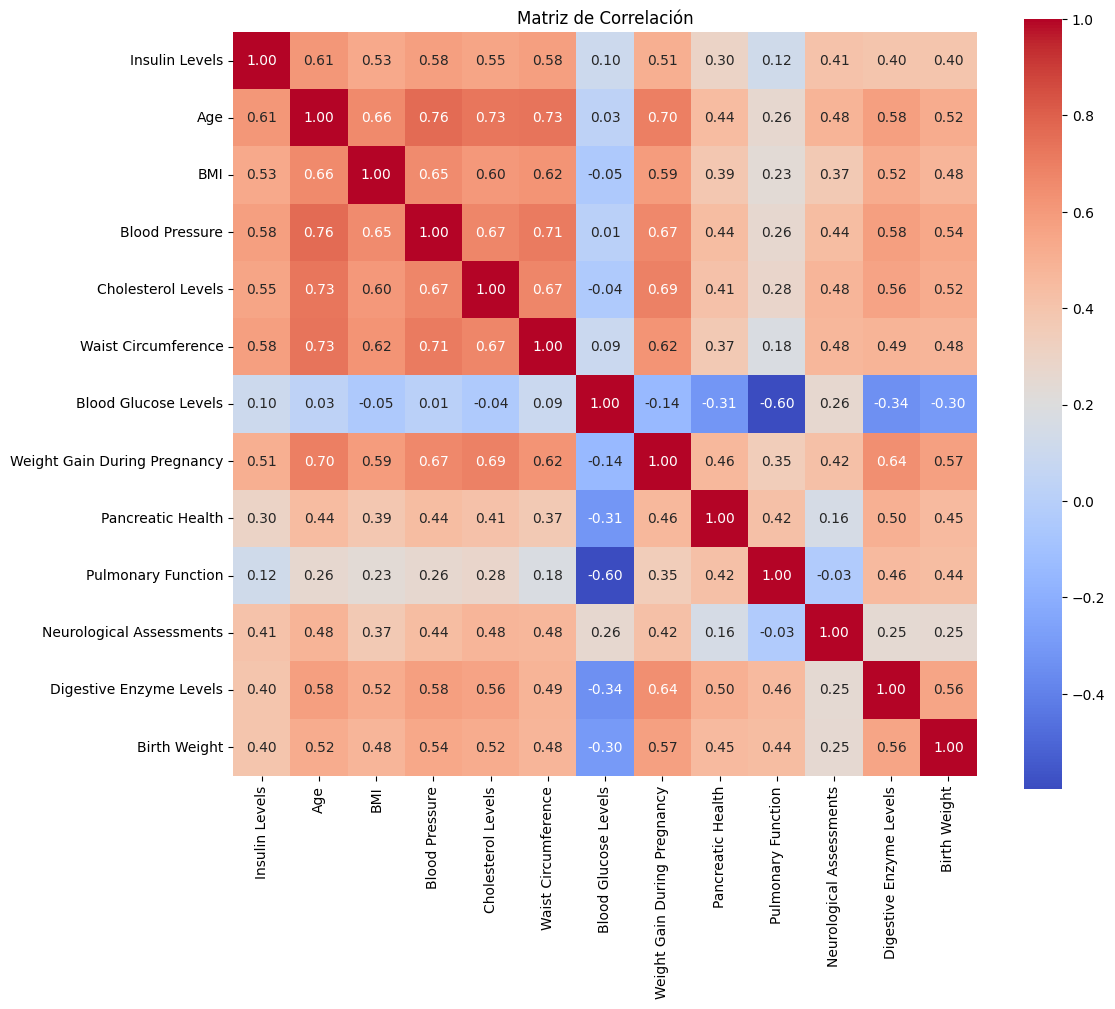

In [ ]:
# Seleccionar solo columnas numéricas
numeric_dataframe = dataframe1.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_dataframe.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Añadir título
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
# Imprimir la matriz de correlación
print(correlation_matrix)

                              Insulin Levels       Age       BMI  \
Insulin Levels                      1.000000  0.608128  0.534044   
Age                                 0.608128  1.000000  0.662997   
BMI                                 0.534044  0.662997  1.000000   
Blood Pressure                      0.581814  0.763398  0.654009   
Cholesterol Levels                  0.551892  0.730426  0.603086   
Waist Circumference                 0.580608  0.733633  0.620750   
Blood Glucose Levels                0.102301  0.027659 -0.047480   
Weight Gain During Pregnancy        0.510186  0.698480  0.588552   
Pancreatic Health                   0.295518  0.444710  0.386623   
Pulmonary Function                  0.123034  0.261972  0.233309   
Neurological Assessments            0.411620  0.482672  0.372847   
Digestive Enzyme Levels             0.398418  0.581695  0.523032   
Birth Weight                        0.396347  0.523554  0.476306   

                              Blood Pressure  C

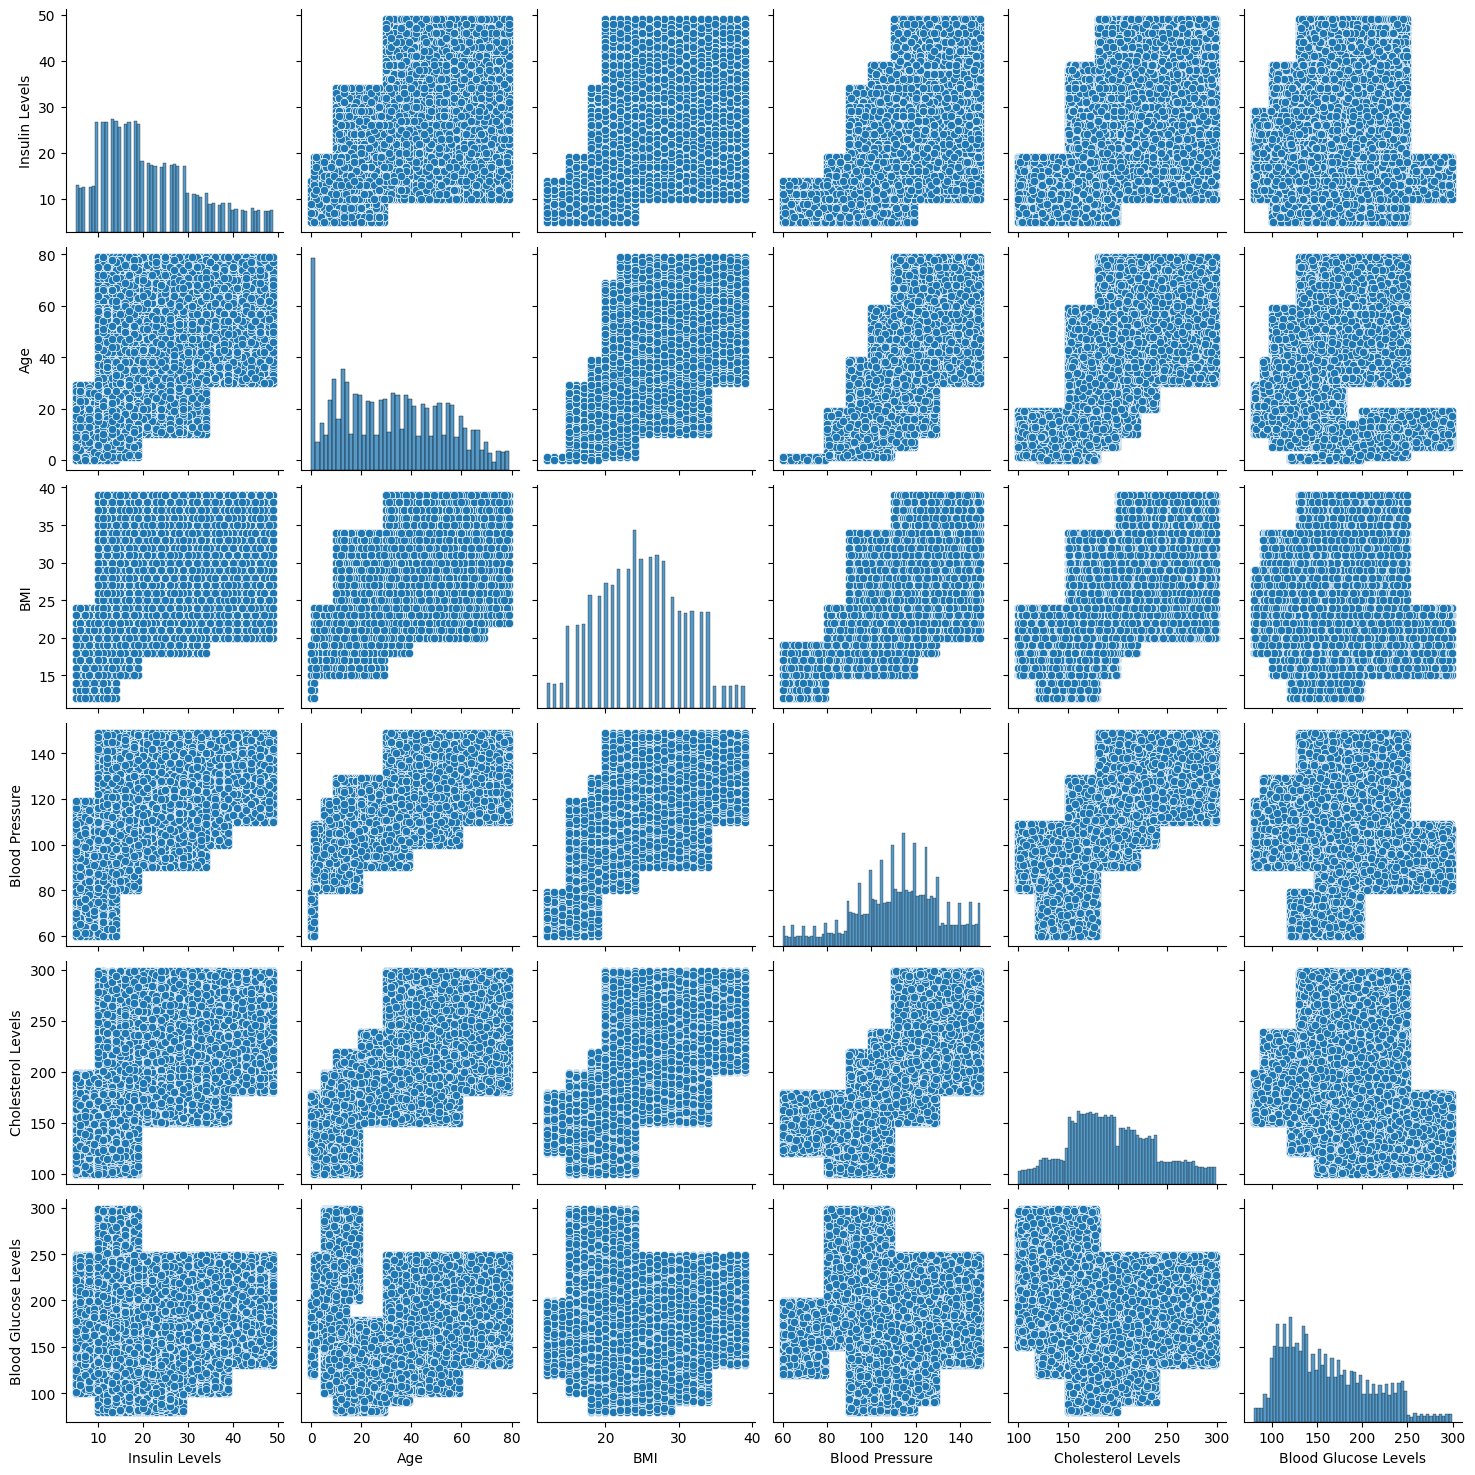

In [ ]:
import seaborn as sns

# Crear un pairplot para visualizar la relación entre variables numéricas
sns.pairplot(dataframe1, vars=['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels'])
plt.show()

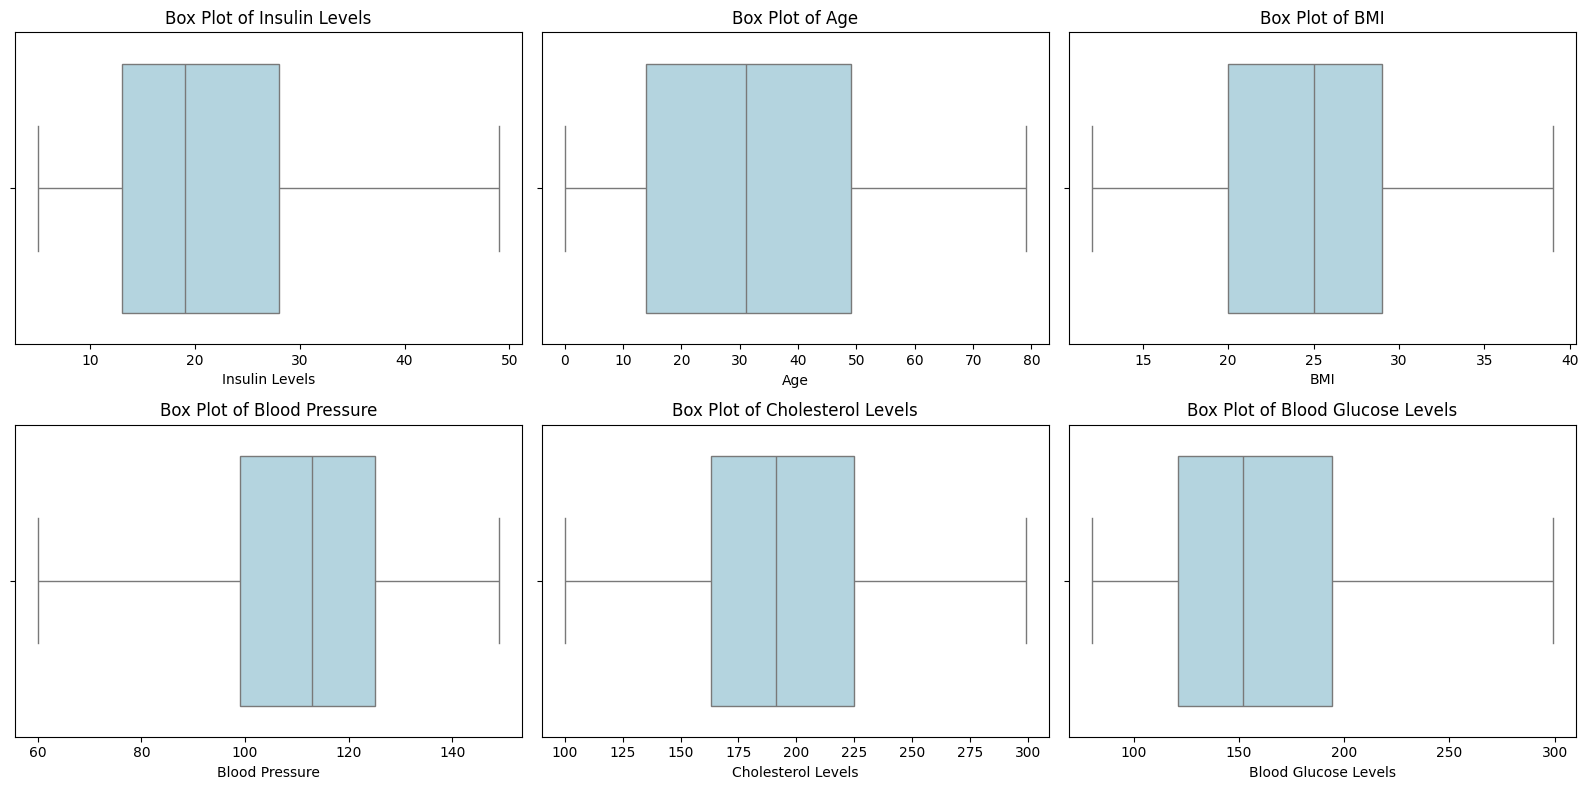

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño de las figuras
plt.figure(figsize=(16, 8))

# Crear un gráfico de caja para las variables seleccionadas
variables = ['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels']

# Iterar sobre las variables y crear un boxplot para cada una
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)  # Crear una disposición 2 filas x 3 columnas
    sns.boxplot(x=dataframe1[var], color='lightblue')
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()


In [ ]:
# Crear una columna de grupo basada en la edad
dataframe1['Age Group'] = np.where(dataframe1['Age'] < 50, 'Under 50', '50 or Older')

# Verificar el tamaño de cada grupo
print(dataframe1['Age Group'].value_counts())

Age Group
Under 50       52890
50 or Older    17110
Name: count, dtype: int64


In [ ]:
from scipy import stats

# Filtrar los datos por grupo
group1 = dataframe1[dataframe1['Age Group'] == 'Under 50']['Blood Glucose Levels']
group2 = dataframe1[dataframe1['Age Group'] == '50 or Older']['Blood Glucose Levels']

group1 = group1.dropna()
group2 = group2.dropna()

# Realizar la prueba t de dos muestras
t_stat, p_value = stats.ttest_ind(group1, group2)

# Mostrar los resultados
print("Estadística t:", t_stat)
print("P-valor:", p_value)

Estadística t: -45.866651256859136
P-valor: 0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer el archivo CSV
dataframe1 = pd.read_csv("/content/diabetes_dataset00.csv")

X = dataframe1[['Insulin Levels', 'Age', 'BMI']]  # Variables independientes
y = dataframe1['Blood Glucose Levels']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener los coeficientes y el término de intercepción
coefficients = model.coef_
intercept = model.intercept_

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print("Coeficientes:", coefficients)
print("Intercepción:", intercept)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)


Coeficientes: [ 0.75499699  0.0690445  -1.29710083]
Intercepción: 174.50898499598514
Error Cuadrático Medio (MSE): 2252.4272237522487
Coeficiente de Determinación (R²): 0.023661229044137255


<ipython-input-17-52f94b32d70f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group1, label='Under 50', shade=True, color='blue')
<ipython-input-17-52f94b32d70f>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group2, label='50 or Older', shade=True, color='red')


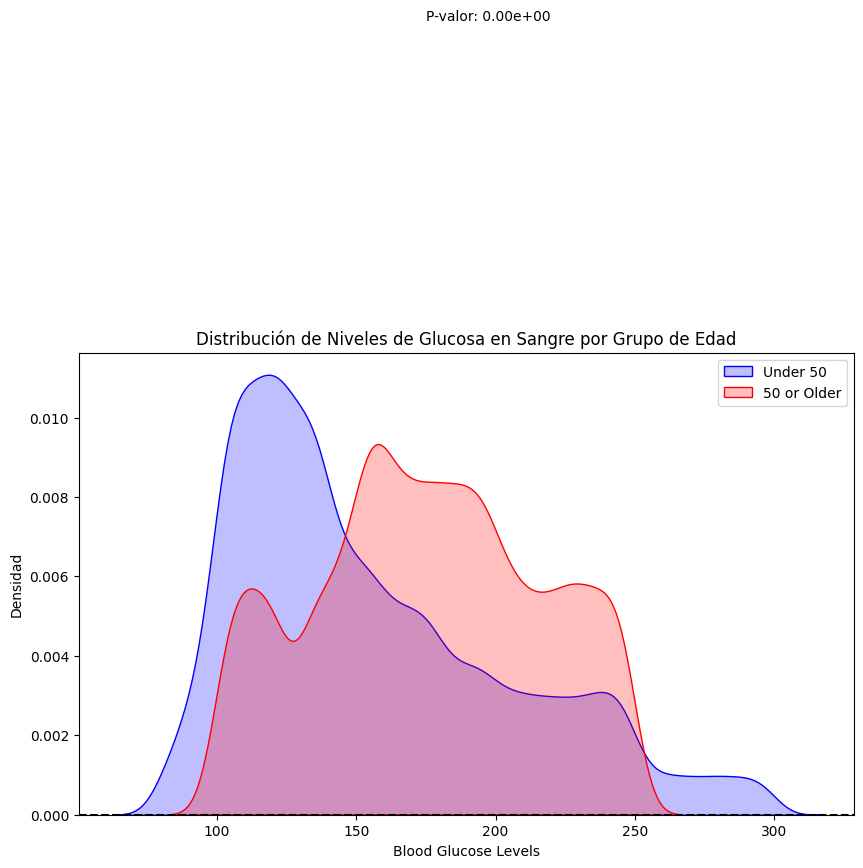

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de densidad para cada grupo
plt.figure(figsize=(10, 6))

# Gráfico de densidad para el grupo "Under 50"
sns.kdeplot(group1, label='Under 50', shade=True, color='blue')

# Gráfico de densidad para el grupo "50 or Older"
sns.kdeplot(group2, label='50 or Older', shade=True, color='red')

# Añadir título y etiquetas
plt.title('Distribución de Niveles de Glucosa en Sangre por Grupo de Edad')
plt.xlabel('Blood Glucose Levels')
plt.ylabel('Densidad')

# Añadir línea con el p-valor
plt.axhline(y=0, color='black', linestyle='--')
plt.text(x=max(group1.mean(), group2.mean()), y=0.02, s=f"P-valor: {p_value:.2e}", color='black')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables independientes (X) y la variable dependiente (y)
X = dataframe1[['Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
                 'Waist Circumference', 'Weight Gain During Pregnancy',
                 'Pancreatic Health', 'Pulmonary Function',
                 'Neurological Assessments', 'Digestive Enzyme Levels',
                 'Birth Weight']]
y = dataframe1['Insulin Levels']

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 64.0202402990687
R^2 Score: 0.4502021604434756


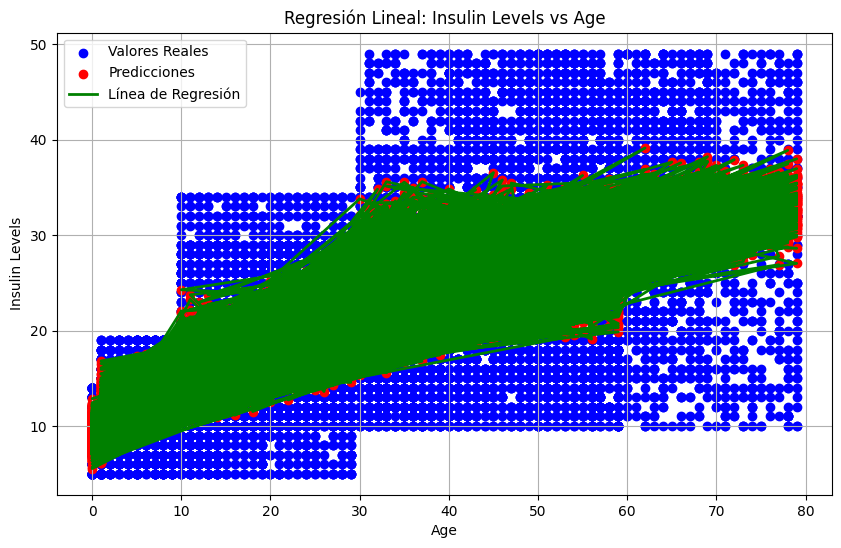

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualización de la regresión para la variable 'Age'
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Age'], y_test, color='blue', label='Valores Reales')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicciones')
plt.plot(X_test['Age'], y_pred, color='green', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal: Insulin Levels vs Age')
plt.xlabel('Age')
plt.ylabel('Insulin Levels')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas
numerical_cols = ['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
                  'Waist Circumference', 'Blood Glucose Levels', 'Weight Gain During Pregnancy',
                  'Pancreatic Health', 'Pulmonary Function', 'Neurological Assessments',
                  'Digestive Enzyme Levels', 'Birth Weight']

# Normalizar las variables
scaler = StandardScaler()
data_normalized = scaler.fit_transform(dataframe1[numerical_cols])

# Crear un nuevo DataFrame con las variables normalizadas
data_normalized_df = pd.DataFrame(data_normalized, columns=numerical_cols)

In [ ]:
# Crear términos de interacción
data_normalized_df['Age_BMI_Interaction'] = data_normalized_df['Age'] * data_normalized_df['BMI']
data_normalized_df['Age_WeightGain_Interaction'] = data_normalized_df['Age'] * data_normalized_df['Weight Gain During Pregnancy']
data_normalized_df['BMI_BloodPressure_Interaction'] = data_normalized_df['BMI'] * data_normalized_df['Blood Pressure']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar las características (X) y el objetivo (y)
X = data_normalized_df.drop(columns=['Insulin Levels'])
y = data_normalized_df['Insulin Levels']

# Ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Predecir los valores
y_pred = model.predict(X)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.5405682148826381
R^2 Score: 0.45943178511736193


   Insulin Levels  Log_Insulin_Levels  Age  Square_Age  BMI  Square_BMI
0              40            3.713572   44        1936   38        1444
1              13            2.639057    1           1   17         289
2              27            3.332205   36        1296   24         576
3               8            2.197225    7          49   16         256
4              17            2.890372   10         100   17         289


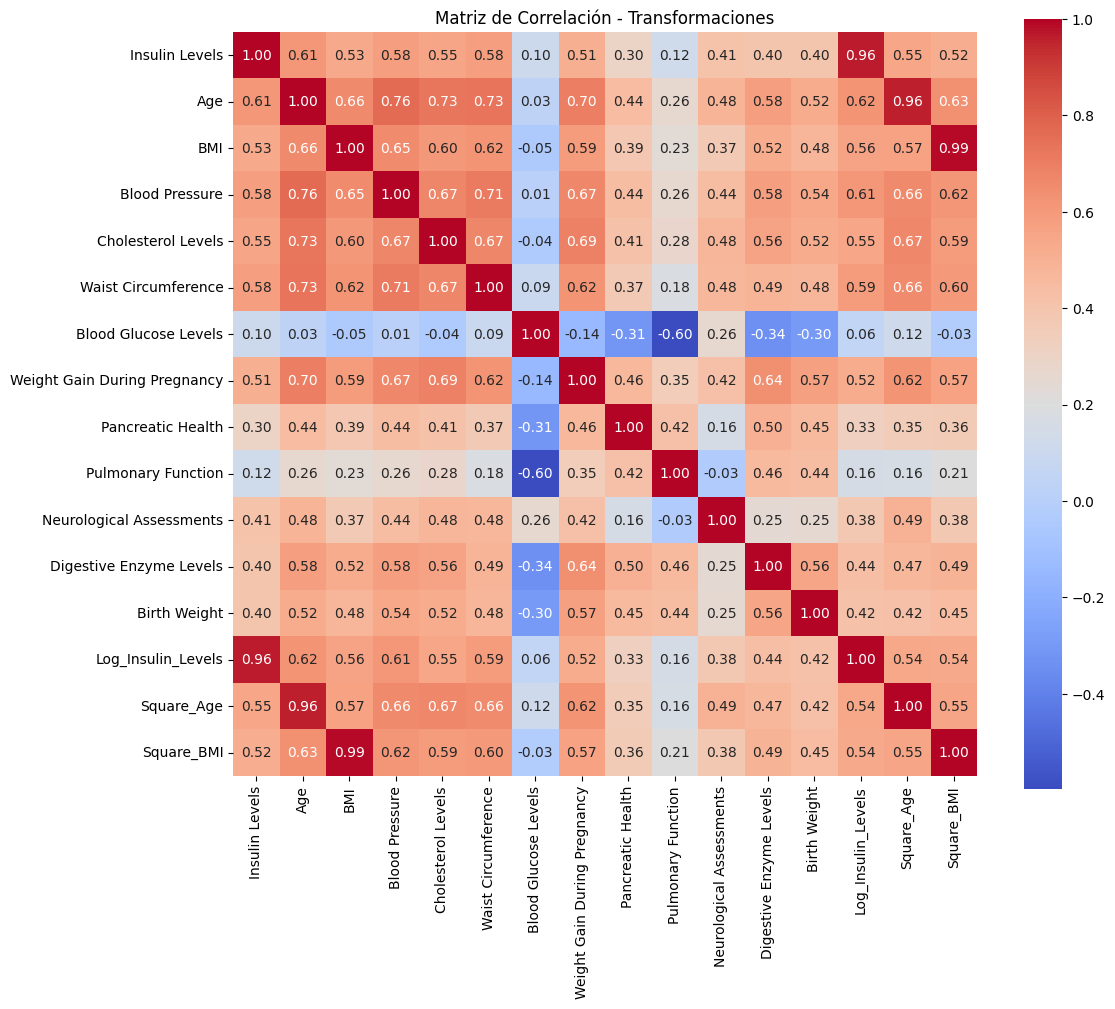

In [ ]:
import numpy as np
import pandas as pd

# Aplicar transformaciones logarítmicas y cuadráticas
dataframe1['Log_Insulin_Levels'] = np.log(dataframe1['Insulin Levels'] + 1)  # +1 para evitar log(0)
dataframe1['Square_Age'] = dataframe1['Age'] ** 2
dataframe1['Square_BMI'] = dataframe1['BMI'] ** 2

# Ver las primeras filas para verificar las nuevas columnas
print(dataframe1[['Insulin Levels', 'Log_Insulin_Levels', 'Age', 'Square_Age', 'BMI', 'Square_BMI']].head())

# Filtrar solo columnas numéricas para la matriz de correlación
numeric_columns = dataframe1.select_dtypes(include=[np.number]).columns.tolist()

# Recalcular la matriz de correlación usando solo columnas numéricas
correlation_matrix_transformed = dataframe1[numeric_columns].corr()

# Mostrar la nueva matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_transformed, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación - Transformaciones')
plt.show()

In [ ]:
# Imprimir la matriz de correlación
print(correlation_matrix_transformed)

                              Insulin Levels       Age       BMI  \
Insulin Levels                      1.000000  0.608128  0.534044   
Age                                 0.608128  1.000000  0.662997   
BMI                                 0.534044  0.662997  1.000000   
Blood Pressure                      0.581814  0.763398  0.654009   
Cholesterol Levels                  0.551892  0.730426  0.603086   
Waist Circumference                 0.580608  0.733633  0.620750   
Blood Glucose Levels                0.102301  0.027659 -0.047480   
Weight Gain During Pregnancy        0.510186  0.698480  0.588552   
Pancreatic Health                   0.295518  0.444710  0.386623   
Pulmonary Function                  0.123034  0.261972  0.233309   
Neurological Assessments            0.411620  0.482672  0.372847   
Digestive Enzyme Levels             0.398418  0.581695  0.523032   
Birth Weight                        0.396347  0.523554  0.476306   
Log_Insulin_Levels                  0.962694  0.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Definir las características y la variable objetivo
X = dataframe1[['Age', 'BMI', 'Blood Pressure', 'Square_Age', 'Square_BMI', 'Log_Insulin_Levels']]
y = dataframe1['Insulin Levels']

# Crear un nuevo conjunto de características que incluya interacciones y polinomios
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el MSE y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.835309261728681
R^2 Score: 0.9756507176591196


In [ ]:
print(dataframe1.columns)

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms', 'Log_Insulin_Levels',
       'Square_Age', 'Square_BMI'],
      dtype='object')


In [ ]:
dataframe1['Age_BMI_Interaction'] = dataframe1['Age'] * dataframe1['BMI']

In [ ]:
from sklearn.model_selection import train_test_split

# Definir un umbral para clasificar Insulin Levels
umbral = 25  # Ajusta este valor según sea necesario

# Crear la columna de interacción si no existe
dataframe1['Age_BMI_Interaction'] = dataframe1['Age'] * dataframe1['BMI']

# Define tus variables independientes y dependientes
X = dataframe1[['Log_Insulin_Levels', 'Age', 'Square_Age', 'BMI', 'Square_BMI', 'Age_BMI_Interaction']]
y = (dataframe1['Insulin Levels'] > umbral).astype(int)  # Clasificación binaria

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo
modelo_logistico = LogisticRegression()

# Ajustar el modelo
modelo_logistico.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Realizar predicciones
y_pred = modelo_logistico.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión: {precision}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(cm)

# Informe de clasificación
report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(report)

Precisión: 0.9229285714285714
Matriz de Confusión:
[[8993  483]
 [ 596 3928]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9476
           1       0.89      0.87      0.88      4524

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



In [ ]:
modelo_logistico = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000)
modelo_logistico.fit(X_train, y_train)

# Evaluar el modelo
precision = modelo_logistico.score(X_test, y_test)
print("Precisión con parámetros fijos:", precision)

Precisión con parámetros fijos: 0.9807142857142858


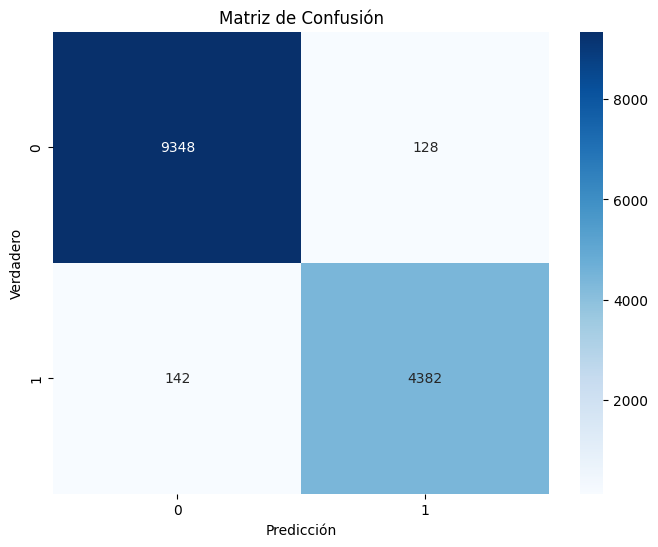

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9476
           1       0.97      0.97      0.97      4524

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [ ]:
# Crear una columna de grupo basada en la edad
dataframe1['Age Group'] = np.where(dataframe1['Age'] < 50, 'Under 50', '50 or Older')

# Verificar el tamaño de cada grupo
print(dataframe1['Age Group'].value_counts())

Age Group
Under 50       52890
50 or Older    17110
Name: count, dtype: int64


In [ ]:
from scipy import stats

# Filtrar los datos por grupo
group1 = dataframe1[dataframe1['Age Group'] == 'Under 50']['Blood Glucose Levels']
group2 = dataframe1[dataframe1['Age Group'] == '50 or Older']['Blood Glucose Levels']

group1 = group1.dropna()
group2 = group2.dropna()

# Realizar la prueba t de dos muestras
t_stat, p_value = stats.ttest_ind(group1, group2)

# Mostrar los resultados
print("Estadística t:", t_stat)
print("P-valor:", p_value)


Estadística t: -45.866651256859136
P-valor: 0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = dataframe1[['Insulin Levels', 'Age', 'BMI']]  # Variables independientes
y = dataframe1['Blood Glucose Levels']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener los coeficientes y el término de intercepción
coefficients = model.coef_
intercept = model.intercept_

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print("Coeficientes:", coefficients)
print("Intercepción:", intercept)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

Coeficientes: [ 0.75499699  0.0690445  -1.29710083]
Intercepción: 174.50898499598514
Error Cuadrático Medio (MSE): 2252.4272237522487
Coeficiente de Determinación (R²): 0.023661229044137255


In [ ]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 73.8 MB/s eta 0:00:00


In [43]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la aplicación Dash
app = Dash(__name__)

# Leer los datos
dataframe1 = pd.read_csv('/content/diabetes_dataset00.csv')

# Crear la columna de interacción y otras columnas necesarias
dataframe1['Age_BMI_Interaction'] = dataframe1['Age'] * dataframe1['BMI']
dataframe1['Square_Age'] = dataframe1['Age'] ** 2
dataframe1['Square_BMI'] = dataframe1['BMI'] ** 2
dataframe1['Log_Insulin_Levels'] = np.log1p(dataframe1['Insulin Levels'])  # Log-transform para manejar distribuciones sesgadas

# Definir un umbral para clasificar Insulin Levels
umbral = 25

# Definir variables independientes y dependientes para regresión logística
X_logistic = dataframe1[['Log_Insulin_Levels', 'Age', 'Square_Age', 'BMI', 'Square_BMI', 'Age_BMI_Interaction']]
y_logistic = (dataframe1['Insulin Levels'] > umbral).astype(int)

# Dividir el conjunto de datos para la regresión logística
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística
modelo_logistico = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000)
modelo_logistico.fit(X_train_logistic, y_train_logistic)
y_pred_logistic = modelo_logistico.predict(X_test_logistic)

# Calcular precisión y matriz de confusión
precision_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
report_logistic = classification_report(y_test_logistic, y_pred_logistic, output_dict=True)

# Layout del dashboard
app.layout = html.Div([
    html.H1("Análisis Completo sobre Diabetes"),

    # Introducción y motivos del análisis
    html.H2("Introducción y Motivos del Análisis"),
    html.P("Este análisis se realiza para entender cómo diversas variables clínicas impactan en la probabilidad de que un paciente padezca diabetes. "
           "A través de análisis de hipótesis y regresión logística, se busca obtener conclusiones clave sobre los factores más relevantes."),

    # Análisis Descriptivo
    html.H2("Análisis Descriptivo de las Variables"),
    html.P("Explora cómo se distribuyen las variables en el conjunto de datos."),
    dcc.Dropdown(
        id='quantitative-variable-dropdown',
        options=[{'label': col, 'value': col} for col in dataframe1.select_dtypes(include=['int64', 'float64']).columns],
        value='Age'
    ),
    dcc.Dropdown(
        id='quantitative-graph-type',
        options=[
            {'label': 'Diagrama de Dispersión', 'value': 'scatter'},
            {'label': 'Boxplot', 'value': 'boxplot'},
            {'label': 'Matriz de Correlación', 'value': 'heatmap'}
        ],
        value='scatter'
    ),
    dcc.Graph(id='quantitative-graph'),

    # Conclusiones del análisis descriptivo
    html.H2("Conclusiones del Análisis de Variables"),
    html.P("Observamos que los niveles de glucosa tienden a aumentar con la edad, y que hay una fuerte relación entre los niveles de insulina y la presión arterial."),

    # Variables cualitativas
    html.H2("Análisis de Variables Cualitativas"),
    dcc.Dropdown(
        id='qualitative-variable-dropdown',
        options=[{'label': col, 'value': col} for col in dataframe1.select_dtypes(include=['object']).columns],
        value='Ethnicity'
    ),
    dcc.Dropdown(
        id='qualitative-graph-type',
        options=[{'label': 'Gráfico de Pastel', 'value': 'pie'}],
        value='pie'
    ),
    dcc.Graph(id='qualitative-graph'),

    # Resultados de la Prueba de Hipótesis
    html.H2("Resultados de la Prueba de Hipótesis"),
    html.P("Se realizaron pruebas de hipótesis para determinar si existen diferencias significativas entre grupos de edad en relación con los niveles de glucosa en sangre."),
    html.P("Estadística t: -45.87"),
    html.P("P-valor: 0.0 (diferencia significativa entre los grupos)"),

    # Resultados de la Regresión Logística
    html.H2("Resultados de la Regresión Logística"),
    html.Div(id='logistic-results', children=[
        html.P(f"Precisión: {precision_logistic:.2f}"),
        html.P(f"Informe de Clasificación: {report_logistic['1']['precision']:.2f}"),
        dcc.Graph(figure=px.imshow(conf_matrix_logistic, title="Matriz de Confusión", color_continuous_scale='Blues'))
    ]),

    # Documentación del proceso
    html.H2("Documentación del Proceso"),
    html.Div(id='documentation-output'),
])

# Callbacks para gráficos cuantitativos
@app.callback(
    Output('quantitative-graph', 'figure'),
    Input('quantitative-variable-dropdown', 'value'),
    Input('quantitative-graph-type', 'value')
)
def update_quantitative_graph(selected_var, graph_type):
    if graph_type == 'scatter':
        fig = px.scatter(dataframe1, x=selected_var, y='Blood Glucose Levels', title=f'{selected_var} vs Blood Glucose Levels')
    elif graph_type == 'boxplot':
        fig = px.box(dataframe1, y=selected_var, title=f'Boxplot de {selected_var}')
    elif graph_type == 'heatmap':
        corr_matrix = dataframe1.corr()
        fig = px.imshow(corr_matrix, title="Matriz de Correlación", color_continuous_scale='RdBu_r')
    return fig

# Callbacks para gráficos cualitativos
@app.callback(
    Output('qualitative-graph', 'figure'),
    Input('qualitative-variable-dropdown', 'value'),
    Input('qualitative-graph-type', 'value')
)
def update_qualitative_graph(selected_var, graph_type):
    if graph_type == 'pie':
        fig = px.pie(dataframe1, names=selected_var, title=f'Gráfico de Pastel: {selected_var}')
    return fig

# Callback para documentación del proceso
@app.callback(
    Output('documentation-output', 'children'),
    Input('quantitative-graph', 'figure')
)
def update_documentation(_):
    documentation = html.Div([
        html.H4("Documentación del Proceso"),
        html.P("Este dashboard documenta el análisis de un conjunto de datos de diabetes utilizando técnicas estadísticas."),
        html.P("Las variables han sido transformadas para mejorar la distribución de los datos y la predicción en modelos de regresión."),

    ])
    return documentation

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>